In [1]:
using LinearAlgebra;
import PyPlot as plt;
import SymPy as sp;

In [2]:
xi, eta = sp.symbols("xi eta");

# standard triangle element (P2)

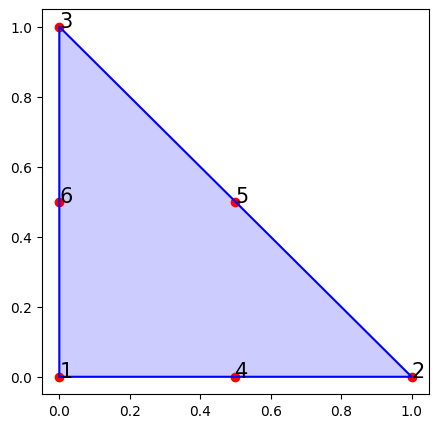

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [3]:
local_coords_order_2 = [
    0 0;
    1 0;
    0 1;
    0.5 0;
    0.5 0.5;
    0 0.5;
];
plt.figure(figsize=(5, 5));
for i in 1:size(local_coords_order_2, 1)
    plt.plot(local_coords_order_2[i, 1], local_coords_order_2[i, 2], "o", color="red");
    plt.text(local_coords_order_2[i, 1], local_coords_order_2[i, 2], string(i), zorder=10, size=15);
end
plt.plot(local_coords_order_2[[1,2,3,1], 1], local_coords_order_2[[1,2,3,1], 2], color="blue");
plt.fill(local_coords_order_2[[1,2,3,1], 1], local_coords_order_2[[1,2,3,1], 2], color="blue", alpha=0.2);
display(plt.gcf());
plt.show()

# shape functions

In [4]:
base_functions_vector = [1, xi, eta, xi^2, xi*eta, eta^2];
n_base_functions = length(base_functions_vector);
base_functions_vector

6-element Vector{SymPy.Sym}:
      1
     ξ
    η
   xi^2
 η⋅ξ
  eta^2

In [5]:
base_functions_matrix_order_2 = sp.zeros(n_base_functions, n_base_functions);
for i_node = 1: n_base_functions
    subs_dict = Dict(xi => local_coords_order_2[i_node, 1], eta => local_coords_order_2[i_node, 2]);
    base_functions_matrix_order_2[i_node, :] = base_functions_vector.subs(subs_dict).T;
end
base_functions_matrix_order_2

6×6 Matrix{Float64}:
 1.0  0.0  0.0  0.0   0.0   0.0
 1.0  1.0  0.0  1.0   0.0   0.0
 1.0  0.0  1.0  0.0   0.0   1.0
 1.0  0.5  0.0  0.25  0.0   0.0
 1.0  0.5  0.5  0.25  0.25  0.25
 1.0  0.0  0.5  0.0   0.0   0.25

In [6]:
shape_functions_vector = base_functions_vector' * inv(base_functions_matrix_order_2);
shape_functions_vector = shape_functions_vector'

6-element Vector{SymPy.Sym}:
 2.0*eta^2 + 4.0*eta*xi - 3.0*eta + 2.0*xi^2 - 3.0*xi + 1.0
                                          2.0*xi^2 - 1.0*xi
                                        2.0*eta^2 - 1.0*eta
                            -4.0*eta*xi - 4.0*xi^2 + 4.0*xi
                                                 4.0⋅η⋅ξ
                          -4.0*eta^2 - 4.0*eta*xi + 4.0*eta

In [7]:
for i_node = 1: n_base_functions
    subs_dict = Dict(xi => local_coords_order_2[i_node, 1], eta => local_coords_order_2[i_node, 2]);
    println("Node ", i_node, ": ", shape_functions_vector.subs(subs_dict));
end

Node 1: SymPy.Sym

[1.00000000000000; 0; 0; 0; 0; 0;;]
Node 2: SymPy.Sym[0; 1.00000000000000; 0; 0; 0; 0;;]
Node 3: SymPy.Sym[0; 0; 1.00000000000000; 0; 0; 0;;]
Node 4: SymPy.Sym[0; 0; 0; 1.00000000000000; 0; 0;;]
Node 5: SymPy.Sym[0; 0; 0; 0; 1.00000000000000; 0;;]
Node 6: SymPy.Sym[0; 0; 0; 0; 0; 1.00000000000000;;]


In [8]:
shape_functions_cartesian_product_matrix = shape_functions_vector * shape_functions_vector.T;
shape_functions_cartesian_product_matrix.simplify()
shape_functions_cartesian_product_matrix

6×6 Matrix{SymPy.Sym}:
                               16.0*(0.5*eta^2 + eta*xi - 0.75*eta + 0.5*xi^2 - 0.75*xi + 0.25)^2  …  (-4.0*eta^2 - 4.0*eta*xi + 4.0*eta)*(2.0*eta^2 + 4.0*eta*xi - 3.0*eta + 2.0*xi^2 - 3.0*xi + 1.0)
                 (2.0*xi^2 - 1.0*xi)*(2.0*eta^2 + 4.0*eta*xi - 3.0*eta + 2.0*xi^2 - 3.0*xi + 1.0)                                              (2.0*xi^2 - 1.0*xi)*(-4.0*eta^2 - 4.0*eta*xi + 4.0*eta)
               (2.0*eta^2 - 1.0*eta)*(2.0*eta^2 + 4.0*eta*xi - 3.0*eta + 2.0*xi^2 - 3.0*xi + 1.0)                                            (2.0*eta^2 - 1.0*eta)*(-4.0*eta^2 - 4.0*eta*xi + 4.0*eta)
   (-4.0*eta*xi - 4.0*xi^2 + 4.0*xi)*(2.0*eta^2 + 4.0*eta*xi - 3.0*eta + 2.0*xi^2 - 3.0*xi + 1.0)                                (-4.0*eta^2 - 4.0*eta*xi + 4.0*eta)*(-4.0*eta*xi - 4.0*xi^2 + 4.0*xi)
                          4.0*eta*xi*(2.0*eta^2 + 4.0*eta*xi - 3.0*eta + 2.0*xi^2 - 3.0*xi + 1.0)                                                       4.0*eta*xi*(-4.0*eta^2 - 4.0*

In [9]:
mass_matrix = zeros(n_base_functions, n_base_functions);
for i_node = 1: n_base_functions
    for j_node = 1: n_base_functions
        mass_matrix[i_node, j_node] = Float64(
            sp.integrate(shape_functions_cartesian_product_matrix[i_node, j_node], 
            (xi, 0, 1 - eta), (eta, 0, 1)));
    end
end
mass_matrix

6×6 Matrix{Float64}:
  0.0166667    -0.00277778   -0.00277778   …  -0.0111111     4.44089e-16
 -0.00277778    0.0166667    -0.00277778       2.22045e-16  -0.0111111
 -0.00277778   -0.00277778    0.0166667       -1.11022e-16  -1.11022e-16
  3.26128e-15  -2.22045e-16  -0.0111111        0.0444444     0.0444444
 -0.0111111     2.22045e-16  -1.11022e-16      0.0888889     0.0444444
  4.44089e-16  -0.0111111    -1.11022e-16  …   0.0444444     0.0888889